<a href="https://colab.research.google.com/github/supertime1/PPG_DSP/blob/main/Time_Series_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', index_col='date', parse_dates=['date'])

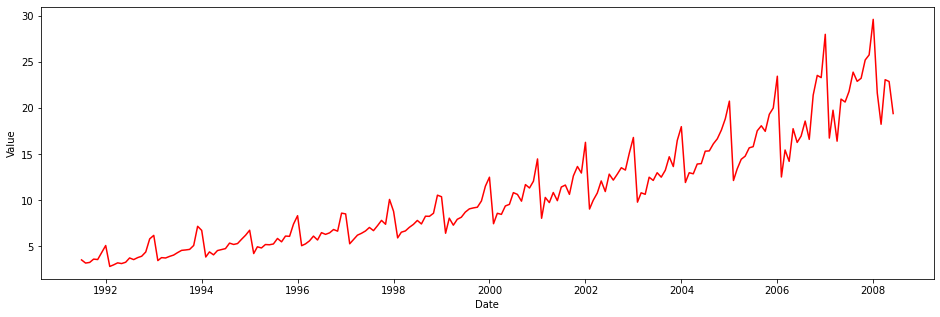

In [32]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df.value, 'r')

plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', index_col='date', parse_dates=['date'])
df.reset_index(inplace=True)

In [40]:
df['year'] = [d.year for d in df.date]

In [41]:
df['month'] = [d.month for d in df.date]

In [43]:
df['months'] = [d.strftime('%b') for d in df.date]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


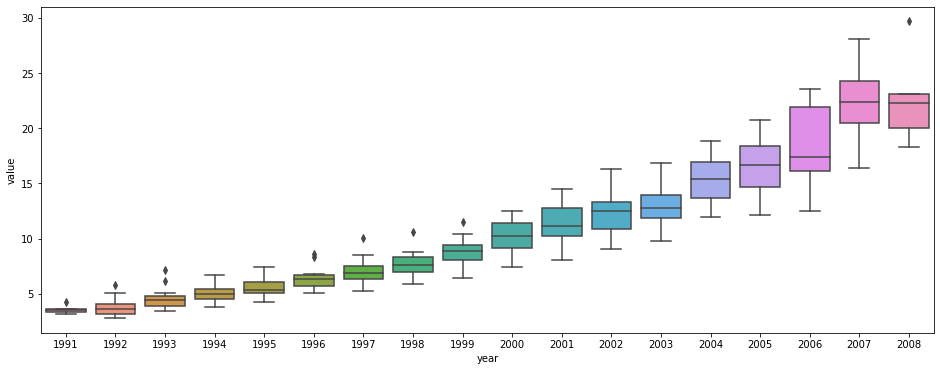

In [47]:
plt.figure(figsize=(16,6))
sns.boxplot('year','value',data=df)

Text(0.5, 0.98, 'Multiplicative Decompose')

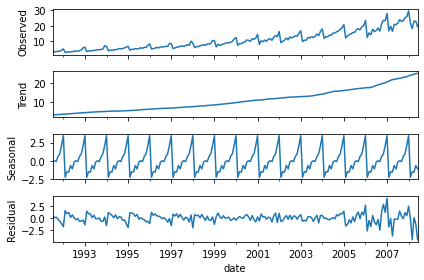

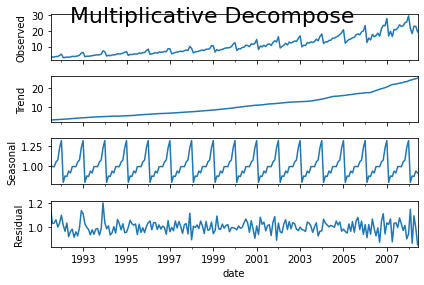

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

result_add.plot()
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)

In [53]:
from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# ADF Test
# null hypothesis is the data is non-stationary
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: 3.145185689306741
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [ ]:
df.value.values[1:]

In [99]:
new_y = [(i - j) for i, j in zip(df.value.values, df.value.values[1:])]

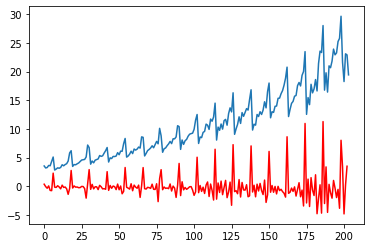

In [100]:
plt.plot(new_y, 'r')
plt.plot(df.value.values)

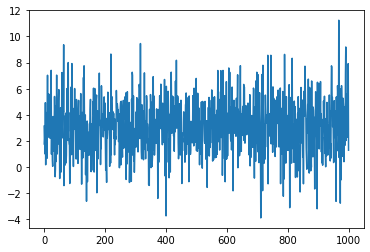

In [79]:
randvals = 2 * np.random.randn(1000) + 3
plt.plot(randvals)

In [ ]:
# Subtracting the Trend Component.
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

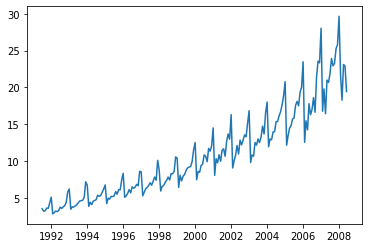

In [114]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
plt.plot(df.date, df.value)

#Signal processing coding

### Moving average with stride and padding

In [182]:
y = np.random.randint(0,100,100)
def moving_average(y, window_size, stride=1):
    output = []
    output_len = len(y) // stride
    for i in range(output_len):
        output.append(np.mean(y[i*stride: i*stride+window_size]))
    return output
output = moving_average(y, 10, stride=2)

### Change shape

In [165]:
#add dimension
a = np.zeros([64,1000])
a_expand = np.expand_dims(a, 2)
print(a_expand.shape)
#remove dimension
a = np.zeros([64,1000])
a_squeeze = np.reshape(a, (64000))
print(a_squeeze.shape)
#split one dimension into two
a = np.zeros([64,1000])
b = np.reshape(a, (64,10,100))
b.shape

(64, 1000, 1)
(64000,)


(64, 10, 100)

###Rescaling

In [167]:
import sklearn
from sklearn import preprocessing
preprocessing.minmax_scale(a)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Detrend the signal

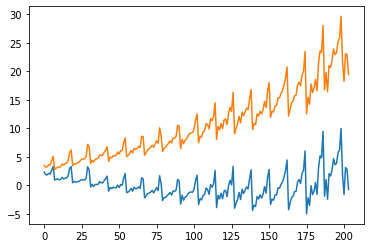

In [89]:
import scipy
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = scipy.signal.detrend(df.value.values)
plt.plot(detrended)
plt.plot(df.value.values)

###DSP for quality factor

In [ ]:
# band pass filter
# slice data into 10s
# apply window
# apply fft

###Shift

In [127]:
xs = np.array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])
def shift(input, n, fill=None):
    output = np.zeros(len(input))
    output[:-n] = input[n:]
    output[-n:] = fill
    return output
output = shift(xs, 2, None)
output

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., nan, nan])

#Build a ML model for signal

In [187]:
import tensorflow as tf
def demo_model(input_shape=None):
    input = tf.keras.layers.Input(input_shape)
    X = tf.keras.layers.LSTM(32, return_sequences=True)(input)
    X = tf.keras.layers.LSTM(64, return_sequences=True)(X)
    output = tf.keras.layers.Dense(1)(X)
    model = tf.keras.Model(inputs=input, outputs=output)
    return model

model = demo_model(input_shape=(10, 256))
model.summary()
    

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 10, 256)]         0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 10, 32)            36992     
_________________________________________________________________
lstm_7 (LSTM)                (None, 10, 64)            24832     
_________________________________________________________________
dense_3 (Dense)              (None, 10, 1)             65        
Total params: 61,889
Trainable params: 61,889
Non-trainable params: 0
_________________________________________________________________
